# SGDClassifier
---
- LogisticRegrrion에 SGD 경사하강법을 적용한 모델
- 필수 설정 파라미터
  * loss pram : 이진/다중 손실함수 이름 지정

In [59]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [60]:
# 경고 무시
# 향후 dprecated된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action='ignore')

## [1] 데이터 준비 

In [61]:
# 파일 불러오기
FILE='C:/Users/User/Data/fish.csv'
fish=pd.read_csv(FILE)

In [62]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [63]:
# 특성
fish_input = fish[fish.columns[1:]].to_numpy()

fish_target = fish['Species'].to_numpy()

In [64]:
## 학습용, 테스트용 데이터 분리 => 8:2
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [65]:
# 표준화 평균0, 표준편차1
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [34]:
# 최적화 경사하강법 변경 : BGD=> SGD 
# loss = 손실함수 : 모델에 따라 다름 ==> 'log'는 곧 deprecated 예정, 'log_loss' 사용
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

# 학습진행 fit(): 반복 횟수 즉 max_iter 만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [35]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [155]:
# partial_fit(): 1 epoch만 학습

# 타겟 분류항목 지정
classes=np.unique(train_target)

sc.partial_fit(train_scaled, train_target, classes=classes)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9663865546218487
0.925


In [165]:
# 최적의 학습 횟수 찾기

sc=SGDClassifier(loss='log_loss', max_iter=1, random_state=42)
sc.fit(train_scaled, train_target)
train_score=[]
test_score=[]
classes=np.unique(train_target)

for i in range(40):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    # print(sc.score(train_scaled, train_target))
    # print(sc.score(test_scaled, test_target))

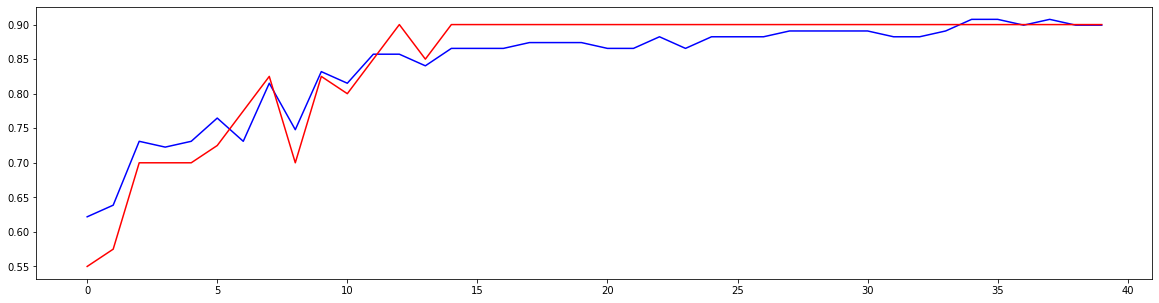

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(train_score, color='b')
plt.plot(test_score, color='r')
plt.show()

In [167]:
# 최적 epoch수로 학습 진행

sc=SGDClassifier(loss='log_loss', max_iter=34, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=34, random_state=42)

In [179]:
# earily_stopping: 조기 종료 여부(기본:False)
# n_iter_no_change: n번 동안 병경되지 않은경우 earily_stopping
# tol: 성능개선의 기준값
sc=SGDClassifier(loss='log_loss', tol=0.000001,
                 random_state=42,
                 n_iter_no_change=10,
                 early_stopping=True)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.8067226890756303
0.85
16


### 학습 횟수(epoch)와 과소/과대적합

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
